In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from scipy import fftpack

In [14]:
N = 256
a = (N - 1 ) / 2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)
x = np.arange(-halfL, halfL+dx, dx)
alpha = 1
psi = (4 * alpha ** 3) / (np.pi) * np.exp((-alpha * x ** 2 ) / 2 )
dpsi = fftpack.diff(psi, period=N*dx)
ddpsi = fftpack.diff(dpsi, period=N*dx)

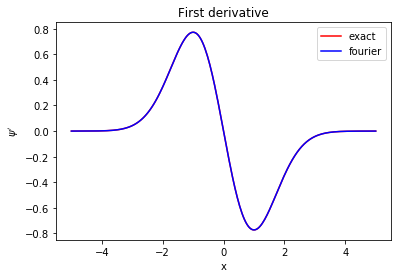

In [4]:
# Plot the figure
dpsi_exact = alpha * (-1) * x * psi
plt.plot(x,dpsi_exact,'r')
plt.plot(x,np.real(dpsi),'b')
plt.xlabel("x")
plt.ylabel(r"$\psi' $")
plt.title('First derivative')
plt.legend(['exact','fourier'])
plt.show()

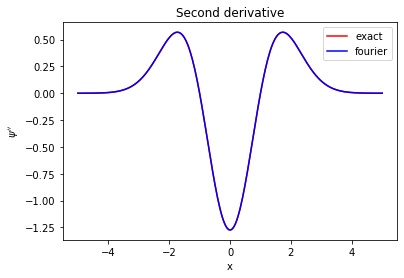

In [15]:
# Plot the figure
ddpsi_exact = alpha * (-1) * ( psi + x * dpsi_exact)
plt.plot(x,ddpsi_exact,'r')
plt.plot(x,np.real(ddpsi),'b')
plt.xlabel("x")
plt.ylabel(r"$\psi'' $")
plt.title('Second derivative')
plt.legend(['exact','fourier'])
plt.show()

In [16]:
def max_error_f(N):
    a = (N - 1 ) / 2
    halfL = 5
    dx = (halfL - (-halfL)) / (N - 1)
    x = np.arange(-halfL, halfL+dx, dx)
    alpha = 1
    psi = (4 * alpha ** 3) / (np.pi) * np.exp((-alpha * x ** 2 ) / 2 )
    dpsi = fftpack.diff(psi, period=N*dx)
    ddpsi = fftpack.diff(dpsi, period=N*dx)

    dpsi_exact = alpha * (-1) * x * psi
    ddpsi_exact = alpha * (-1) * ( psi + x * dpsi_exact)

    error_1st = np.max(abs(dpsi_exact - dpsi))
    error_2nd = np.max(abs(ddpsi_exact - ddpsi))

    return error_1st,error_2nd

In [17]:
N = np.arange(200,1000,1)
error_max_1st = []
error_max_2nd = []
for i in N:
    error_max_1st.append(max_error_f(i)[0])
    error_max_2nd.append(max_error_f(i)[1])

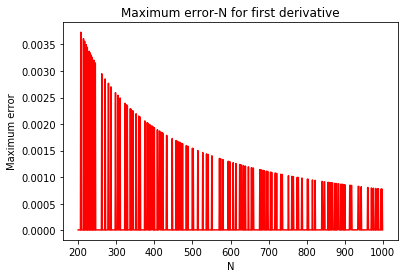

In [13]:
plt.plot(N,error_max_1st,'r')
plt.xlabel('N')
plt.ylabel('Maximum error')
plt.title('Maximum error-N for first derivative')
plt.show()

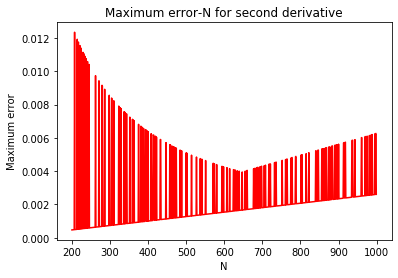

In [18]:
plt.plot(N,error_max_2nd,'r')
plt.xlabel('N')
plt.ylabel('Maximum error')
plt.title('Maximum error-N for second derivative')
plt.show()

### Problem 3

#### Question 1

In [2]:
N = 256
dx = (9 - (-9)) / (N - 1)
x = np.arange(-9, 9+dx, dx)
alpha = 1
psi = (4 * alpha ** 3) / (np.pi) * np.exp((-alpha * x ** 2 ) / 2 )

In [8]:
# define the properties
N = 201
a = (N - 1 ) / 2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx)
psi = np.exp(-(x**2)/2) * np.sin(4*x)

dk = 2*np.pi / (N*dx)
kmax = np.pi / dx
k = np.arange(-kmax+dx, kmax, dk) 

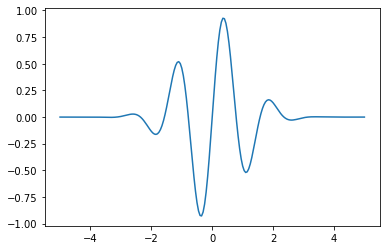

In [4]:
plt.plot(x,psi)

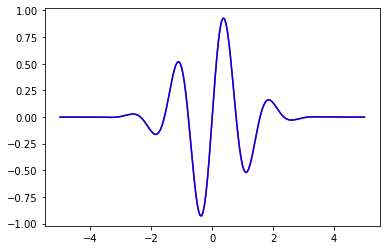

In [5]:
pass_value = fftpack.fft(psi)
dpsi = -1 / 200 * fftpack.fft(pass_value)
fig,ax = plt.subplots()
ax.plot(x,psi,'r', x,np.real(psi),'b')

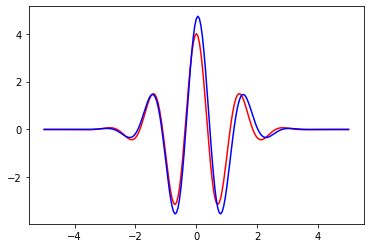

In [10]:
pass_value = fftpack.fft(psi)
dpsi = -1j/200 * fftpack.fft(x *pass_value)
dpsi_exact = -x * psi + 4*np.exp(-(x**2)/2)*np.cos(4*x)
fig,ax = plt.subplots()
ax.plot(x,dpsi_exact,'r', x,np.real(dpsi),'b')

In [21]:
# define the properties
N = 201
a = (N - 1 ) / 2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx)
psi = np.exp(x)


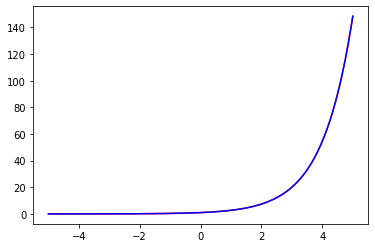

In [22]:
pass_value = fftpack.fft(psi)
dpsi = -1 / 200 * fftpack.fft(pass_value)
fig,ax = plt.subplots()
ax.plot(x,psi,'r', x,np.real(psi),'b')

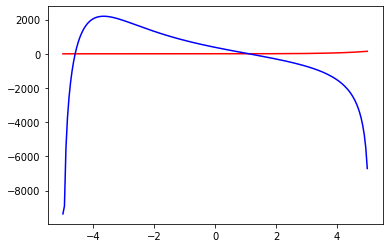

In [24]:
pass_value = fftpack.fft(psi)
dpsi = -1j/200 * fftpack.fft(k *pass_value)
dpsi_exact = np.exp(x)
fig,ax = plt.subplots()
ax.plot(x,dpsi_exact,'r', x,np.real(dpsi),'b')

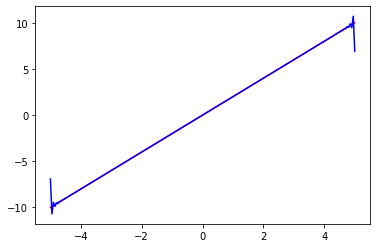

In [29]:
# define the properties
N = 201
a = (N - 1 ) / 2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx)
psi = x**2
# create the 3-dimensional Fourier diff matrix
l = np.arange(N).reshape((-1,1,1))
n = np.arange(N).reshape((1,-1,1))
m = np.arange(N).reshape((1,1,-1))
W = np.exp(2j*np.pi*(m-a)*(l-n)/N)

# perform the Fourier differentiation
psi_for_fft_diff = psi.reshape(1,-1,1)
dpsi = np.sum((2j*np.pi)/(dx*N**2) * psi_for_fft_diff * (m-a) * W, axis=(1,2))

dpsi_exact = 2*x
fig,ax = plt.subplots()
ax.plot(x,dpsi_exact,'r', x,np.real(dpsi),'b')